
## Prodigy Infotech

### Name: Huma Urooj
### Batch : September

### Task 3

* Implement a support vetor machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
dir = 'C:\\Users\\huma\\Desktop\\PGD Module 3 -Machine Learning\\Prodigy Infotech Internship tasks\\imagedata\\dogs_vs_cats'

####  This is a list containing the names of two categories: "cats" and "dogs". This list will likely be used to assign labels to images or data points.
* categories= ['cats', 'dogs']

### Error Handling:

* try-except block is used to handle potential exceptions during image loading or resizing. If an exception occurs, the code continues to the next image.

In [3]:
categories= ['cats', 'dogs'] 

data=[] # This is an empty list that will be used to store data.

In [4]:
for category in categories: #  iterates over each category in the categories list.
    path=os.path.join(dir,category) #creates the path to the directory containing images of the current category.
    label=categories.index(category) # assigns a numerical label to the current category based on its index in the categories list.
    for img in os.listdir(path):  # iterates over each image file in the directory for the current category.
            imgpath=os.path.join(path,img) # creates the path to the individual image file.
            pet_img=cv2.imread(imgpath,0) # loads the image in grayscale mode.
            try:
                pet_img=cv2.resize(pet_img,(50,50)) # resizes the image to 50x50 pixels. because image must be in the same size 
                image=np.array(pet_img).flatten() # converts the image to a NumPy array and flattens it into a 1D feature vector.
                data.append([image,label]) # appends the extracted features and corresponding label to the data list.
            except Exception as e:
                pass

In [5]:
pick_in=open('data1.pickle','wb')  # opens a file named "data1.pickle" in binary write mode. 
pickle.dump(data,pick_in) #  dumps the data object into the open file.
pick_in.close() # closes the file. 

In [6]:
pick_in=open('data1.pickle','rb') # opens the file named "data1.pickle" in binary read mode
d = pickle.load(pick_in) # loads the serialized data from the opened file and assigns it to the variable d
pick_in.close() # closes the file

In [7]:
random.shuffle(d)
features=[] # two empty lists, features and labels. 
labels=[] #These lists will be used to store the extracted features and corresponding labels from the d list.


for feature, label in d:
    features.append(feature) # The feature is appended to the features list,
    labels.append(label) #  and the label is appended to the labels list.

In [8]:
feat =np.array(features) # converts the features list into a NumPy array
feat # this array represents image data.


array([[ 55,  55,  49, ..., 136, 223, 226],
       [220, 235, 239, ...,  70,  72,  66],
       [ 47,  50,  50, ..., 125, 109, 105],
       ...,
       [124, 122, 122, ...,  55,  46,  66],
       [ 76, 113, 127, ...,  64, 101,  66],
       [ 94,  88, 107, ..., 200, 210, 195]], dtype=uint8)

In [9]:
labs = np.array(labels) #  converts the labels list into a NumPy array named labs.
labs  # classes "cat" and "dog" 

array([1, 0, 1, ..., 0, 1, 0])

In [10]:
train_test_split(feat, labs, test_size=0.2)

[array([[144, 144, 144, ..., 143, 144, 144],
        [206, 242, 235, ..., 125, 130, 114],
        [200, 140,  84, ...,  92,  23,  74],
        ...,
        [ 86,  90, 114, ..., 117, 119, 118],
        [ 81,  82,  84, ..., 153, 151, 148],
        [ 37,  43,  48, ...,  50,  54,  58]], dtype=uint8),
 array([[133, 127, 127, ..., 163, 169, 168],
        [101, 101, 100, ...,  21,  27,  16],
        [ 22,  13,  28, ...,  69,  85, 215],
        ...,
        [252, 253, 255, ..., 208, 207, 213],
        [254, 254, 254, ..., 194, 163, 225],
        [196, 163, 137, ..., 215, 210, 211]], dtype=uint8),
 array([0, 0, 1, ..., 0, 1, 0]),
 array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 

In [11]:
X_train, X_test,y_train,y_test= train_test_split(feat, labs, test_size=0.2)


In [12]:
X_train

array([[ 64,  63,  65, ..., 157, 153, 149],
       [ 57,  63,  57, ..., 132, 134, 110],
       [ 74,  70,  59, ...,  34,  85,  23],
       ...,
       [110, 117, 127, ..., 225, 207, 210],
       [101, 111, 111, ..., 193, 183, 173],
       [124, 127, 127, ...,  16,  16,  18]], dtype=uint8)

In [13]:

model = SVC(kernel="poly")

In [14]:
model.fit(X_train, y_train)


SVC(kernel='poly')

In [15]:
y_predict=model.predict(X_test)
y_predict  # holds the predicted labels for the testing data,

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,

Accuracy is:  0.574
Prediction is:  dogs


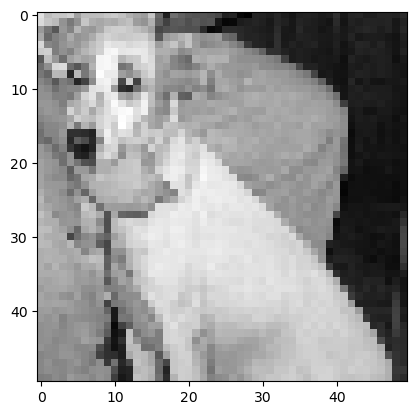

In [16]:


accuracy=model.score(X_test,y_test)

categories=['cats', 'dogs']

print('Accuracy is: ', accuracy)
print('Prediction is: ', categories[y_predict[1]])

mypet=X_test[0].reshape(50,50)   # reshapes it into a 50x50 format, likely because the image was originally flattened or stored in a different shape.
plt.imshow(mypet, cmap='gray')  # displays the reshaped image using Matplotlib's imshow function specifies grayscale colormap for displaying the image.
plt.show()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
# evaluate the model
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[299 172]
 [254 275]]
              precision    recall  f1-score   support

           0       0.54      0.63      0.58       471
           1       0.62      0.52      0.56       529

    accuracy                           0.57      1000
   macro avg       0.58      0.58      0.57      1000
weighted avg       0.58      0.57      0.57      1000



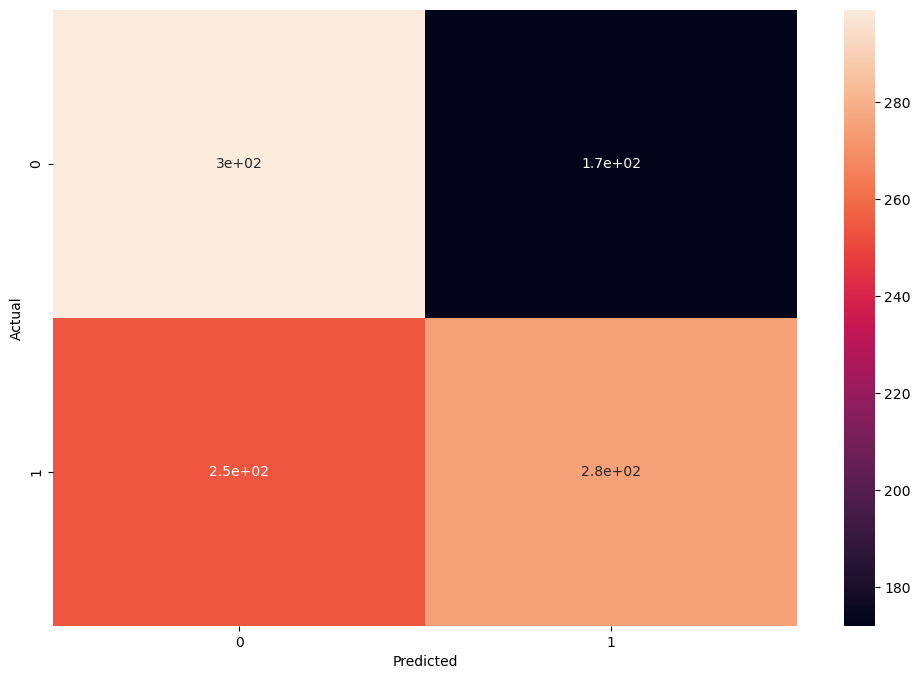

In [18]:
import seaborn as sns

# draw the confusion matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
model.score(X_test, y_test)


0.574

In [20]:
model_C = SVC(C=9)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.601

In [21]:
model_g = SVC(gamma=5)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.471

In [22]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)


SVC(kernel='linear')

In [23]:
model_linear_kernal.score(X_test, y_test)


0.526

In [24]:
model_linear_kernal = SVC(kernel='rbf')
model_linear_kernal.fit(X_train, y_train)

SVC()

In [25]:
model_linear_kernal.score(X_test, y_test)


0.634

In [26]:
#pick=open('data1.pickle','rb')
#model=pickle.load(pick)
#pick.close()
#y_predict=model.predict(X_test)